# Lending Club Data - Auto ML on H2O-3 Open Source

**Lending Club** publishes loan data periodically for public use. The anonymized data has information on different loans issued, such as loan_id, loan_amount, what loan grade, credit score etc., and also a **loan_status** variable that indicates whether a loan was _Fully Paid_ or _Charged Off_ (written off because of default).

This python notebook tutorial shows:
- Kick off Automatic Machine Learning with H2O3 with the training/test prepared 
-  in the previous tutorial
- Score on test data
- Show test model performance
- Download the test predictions

Prerequisites:
- A H2O3 instance available running on-prem or cloud. If not, you can start a local instance
- Get the latest h2o python library by running "!pip install h2o" or "!conda install h2o" etc.,

In [180]:
# Replace below with settings in your environment before you run the notebook

h2o3_ip = "ec2-3-88-25-73.compute-1.amazonaws.com" 


## Create or Connect to H2O3 instance 


In [187]:
import h2o
from h2o.automl import H2OAutoML

# If you want to create and run a local instance instead, (where Jupyter kernel is running) just uncomment below:
# h2o.init()
# and comment the code below:

h2o.init(ip=h2o3_ip,strict_version_check=False)

# If things break, uninstall and install the h2o library and you set strick_version_check to True to see 
# what's going on

Checking whether there is an H2O instance running at http://ec2-3-88-25-73.compute-1.amazonaws.com:54321. connected.


H2O cluster uptime:,15 mins 17 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.5
H2O cluster version age:,24 days
H2O cluster name:,Puddle
H2O cluster total nodes:,1
H2O cluster free memory:,292.2 Gb
H2O cluster total cores:,96
H2O cluster allowed cores:,96
H2O cluster status:,"locked, healthy"


### Upload the Train and Test data to Driverless AI

In [188]:
import os

# These two CSV files were created in the previous section

train_path = os.getcwd()+"/train_lc.csv"
test_path = os.getcwd()+ "/test_lc.csv"

train = h2o.load_dataset(train_path)
test = h2o.load_dataset(test_path)



Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [189]:
train.describe()

# Clearly lot of missing data ...

Rows:34030
Cols:131




,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
type,int,int,int,int,real,enum,real,real,enum,enum,enum,enum,enum,real,enum,time,enum,enum,int,string,enum,enum,enum,enum,real,int,time,int,int,int,int,int,real,int,enum,int,int,int,enum,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,enum,int,int,int,int,int,int,int,int,int,int,int,int,int,int,enum,enum,time,enum,time,real,real,int
mins,NaN,NaN,500.0,500.0,0.0,,0.0542,15.67,,,,,,1896.0,,1180656000000.0,,,NaN,NaN,,,,,0.0,0.0,-757382400000.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,,0.0,NaN,1.0,,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,1264982400000.0,,1235865600000.0,193.29,10.69,0.0
mean,0.0,0.0,11062.779557410295,10793.682222940613,10110.10382181938,,0.12162435418932029,321.7600952185032,,,,,,69123.23260610166,,1285618176812.5303,,,0.0,NaN,,,,,13.356692038675154,0.15286886451195478,853553588753.9337,35.13985396774449,59.802037351443126,9.354527541687498,0.05899479457694908,14362.012578246682,0.4909756376273782,22.145016616180925,,0.0,0.0,1.0,,0.0,0.0,0.0,8.822750933741141e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0007940475840367027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04611554692006436,2.9464627714428828e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,1424994573913.0435,,1396083756521.

### Run Auto ML on training data set


In [190]:
# Identify predictors and response
x = train.columns
y = "loan_status"
x.remove(y)


# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 5 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=5, seed=1)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


### Look at AutoML Leaderboard

In [191]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20190329_191343,0.707432,0.388578,0.480508,0.343669,0.118108
StackedEnsemble_AllModels_AutoML_20190329_191343,0.707379,0.388623,0.481208,0.343701,0.11813
GLM_grid_1_AutoML_20190329_191343_model_1,0.705443,0.389728,0.488211,0.344661,0.118791
GBM_1_AutoML_20190329_191343,0.659423,0.40651,0.484446,0.350531,0.122872
GBM_2_AutoML_20190329_191343,0.657821,0.40844,0.486067,0.351387,0.123473
XRT_1_AutoML_20190329_191343,0.637449,0.405334,0.486618,0.350101,0.12257
DRF_1_AutoML_20190329_191343,0.609261,0.416002,0.486036,0.353124,0.124697


### What's the composition of the StackedEnsemble Leader model ?

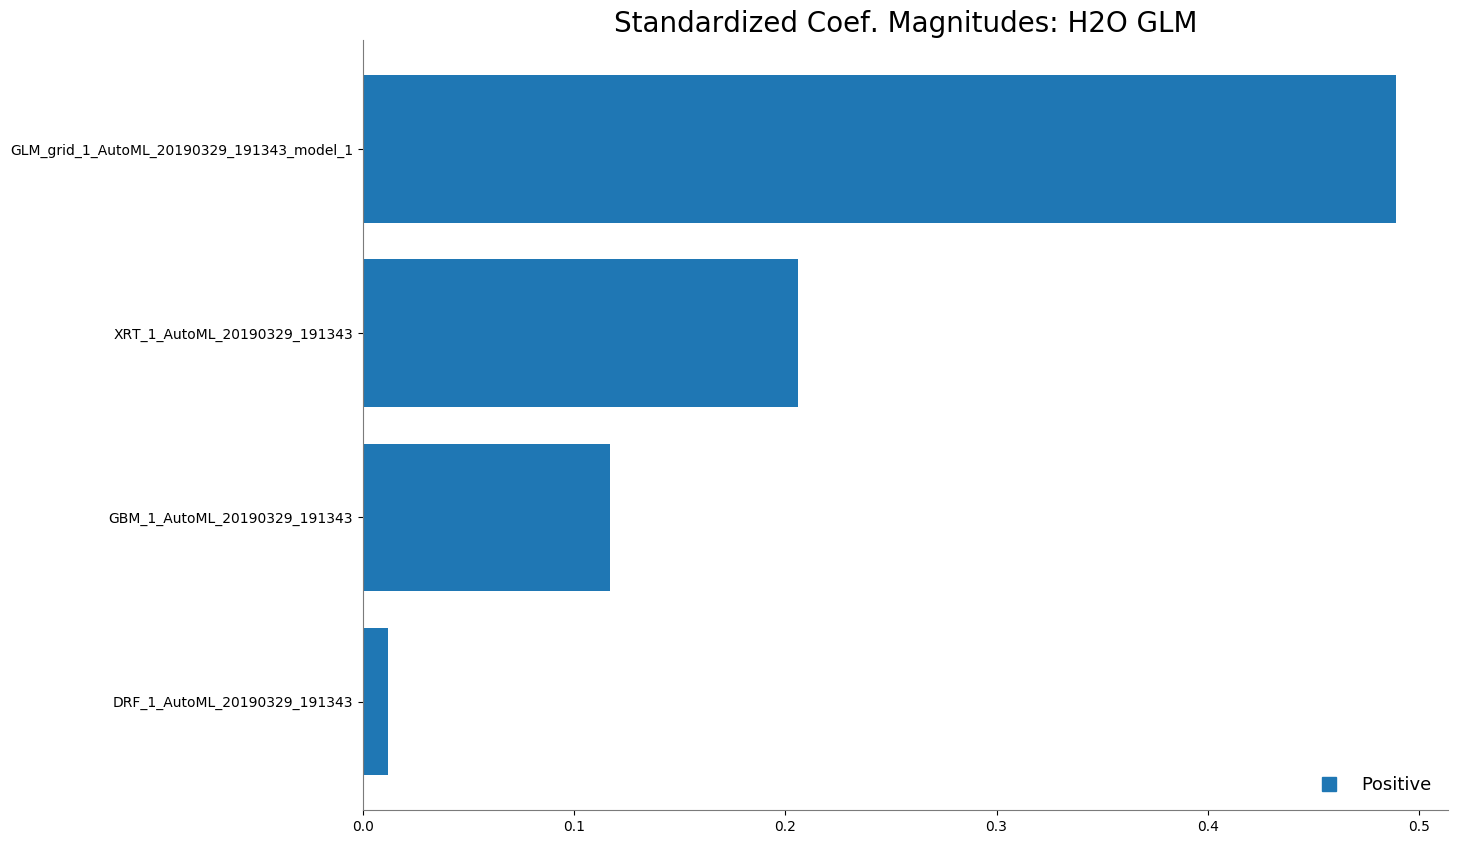

In [192]:
metalearner = h2o.get_model(aml.leader.metalearner()['name'])
metalearner.std_coef_plot()

### Important Features and Attributes of the top GLM Model on the AutoML leaderboard
#### What's causing a Loan to be Fully Paid or Charged Off ?

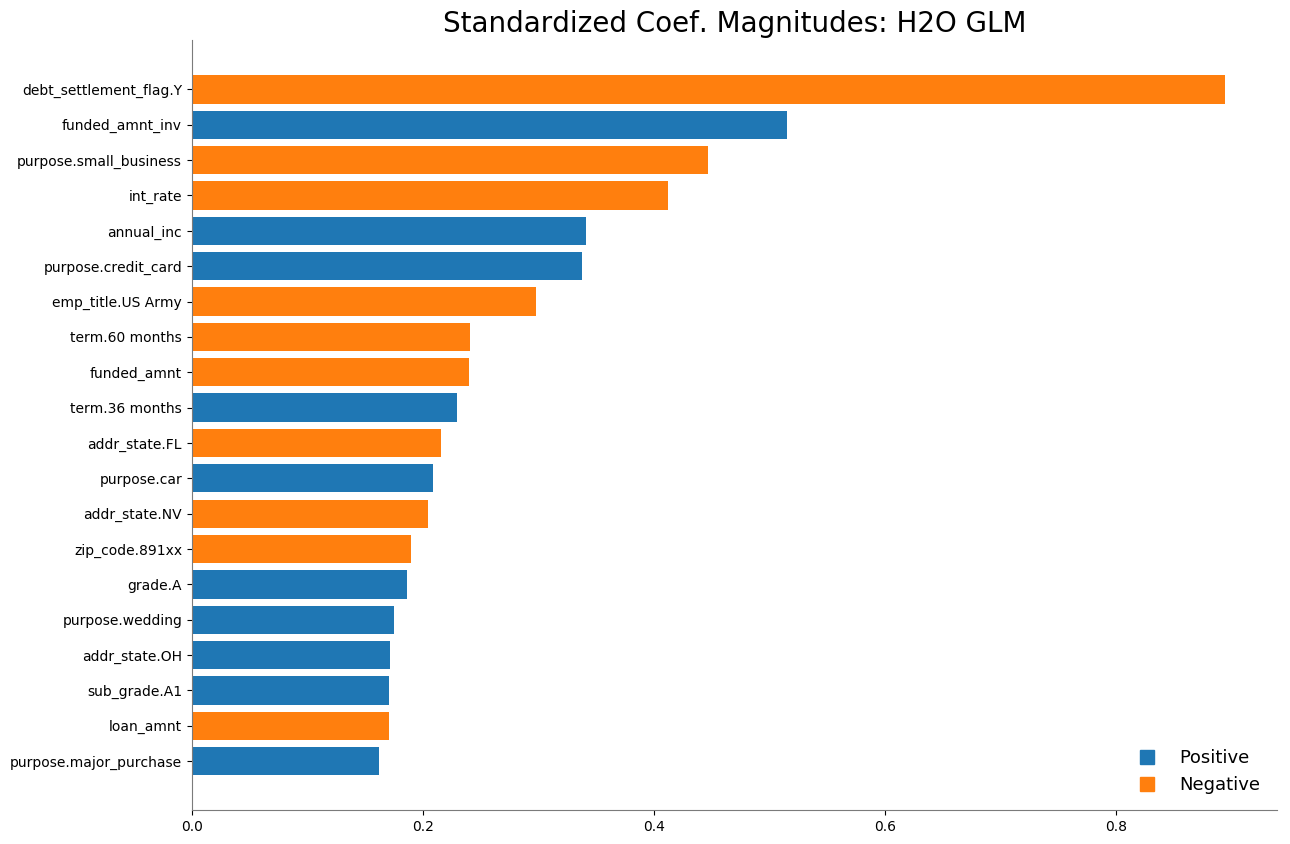

In [208]:
import warnings
warnings.filterwarnings("ignore")

# Get the GLM leader from above for looking at feature importance
df = lb.as_data_frame()
for m in df['model_id'].tolist():
    if (m.find("GLM") != -1):
        glm_leader_model = m
        break
        
h2o.get_model(glm_leader_model).std_coef_plot(num_of_features=20)

### Insights ...
The standardized Coef. Magnitudes of the GLM model in the leaderboard gives us a sense of what's different about a Loan Getting Paid in Full vs Loan getting Charged Off/Defaulted. The features/attributes in blue are the positive reasons (Length of the bar is the order of importance) why the Loan is getting Paid in Full vs the one in the Orange which can be attributed to Loan defaulting. In summary:

##### Popular Reasons why Loan is getting Fully Paid - in the order of importance (Looking only at the Blue bars):
1. **funded_amnt_inv being higher** - The total amount committed by investors for that loan at that point in time.
2. **annual_inc** - Annual income of the borrower
3. **purpose.credit_card** - A category provided by the borrower for the loan request - which is for paying off credit card
4. **term.36_months** - If the loan term is shorter, it's likely it will get paid in full
5. **purpose.car** - If the purpose of the loan is for buying a car, it will probably be paid in Full
6. **grade.A** - If the Loan Grade is "A", then it will be paid - probably correlated to a lower interest rate, qualification etc.,
7. **purpose.wedding** - If the purpose of the loan is for a wedding, it will probably be paid in Full

##### Popular Reasons why Loan is Charged Off - in the order of importance (Looking only at the Orange bars):
1. **debt_settlement_flag.Y** - Kind of a Target leakage. Basically when the customer is talking to a debt settler
2. **purpose.small_business** - A category provided by the borrower for the loan request - which is basically a small business loan
3. **int_rate** - Loan interest rate. If Interest rate is higher then default is likely
4. **emp_title.US_Army** - If the employer is US Army, higher chance of default. That sucks. But that's what the model is saying.
5. **term.60 months** - If the loan term is longer odds go up for defaulting
6. **funded_amnt** - If the loan amount is higher, it's correlated to default
7. **addr_state.FL** - Customers from Florida have a higher rate of default

### Variable Importance Insights from each model in the AutoML Leaderboard
#### The GLM insights in the previous section is a bit deeper than the rest of the algorithms as it shows both features/attributes. However for other algorithms you can just get Rank ordered Variable Importance.

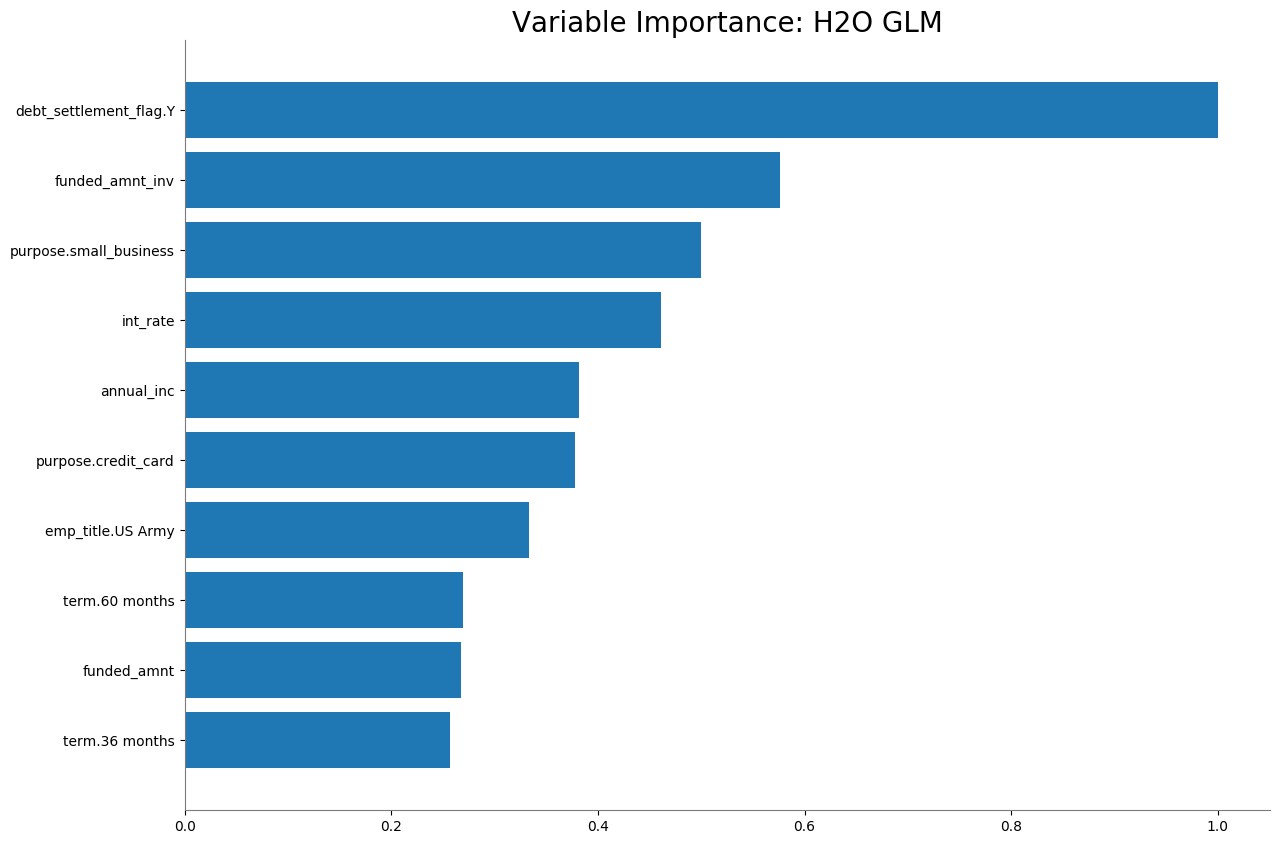

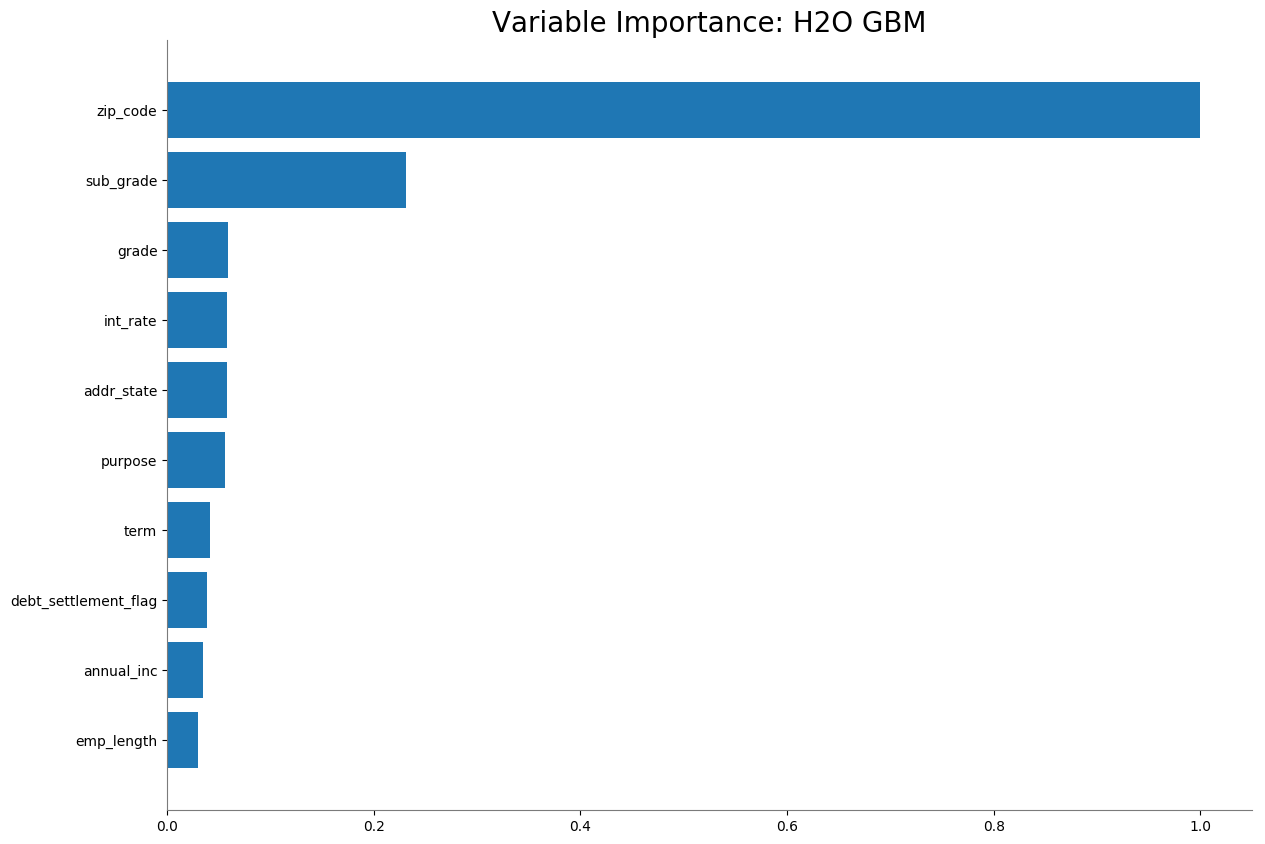

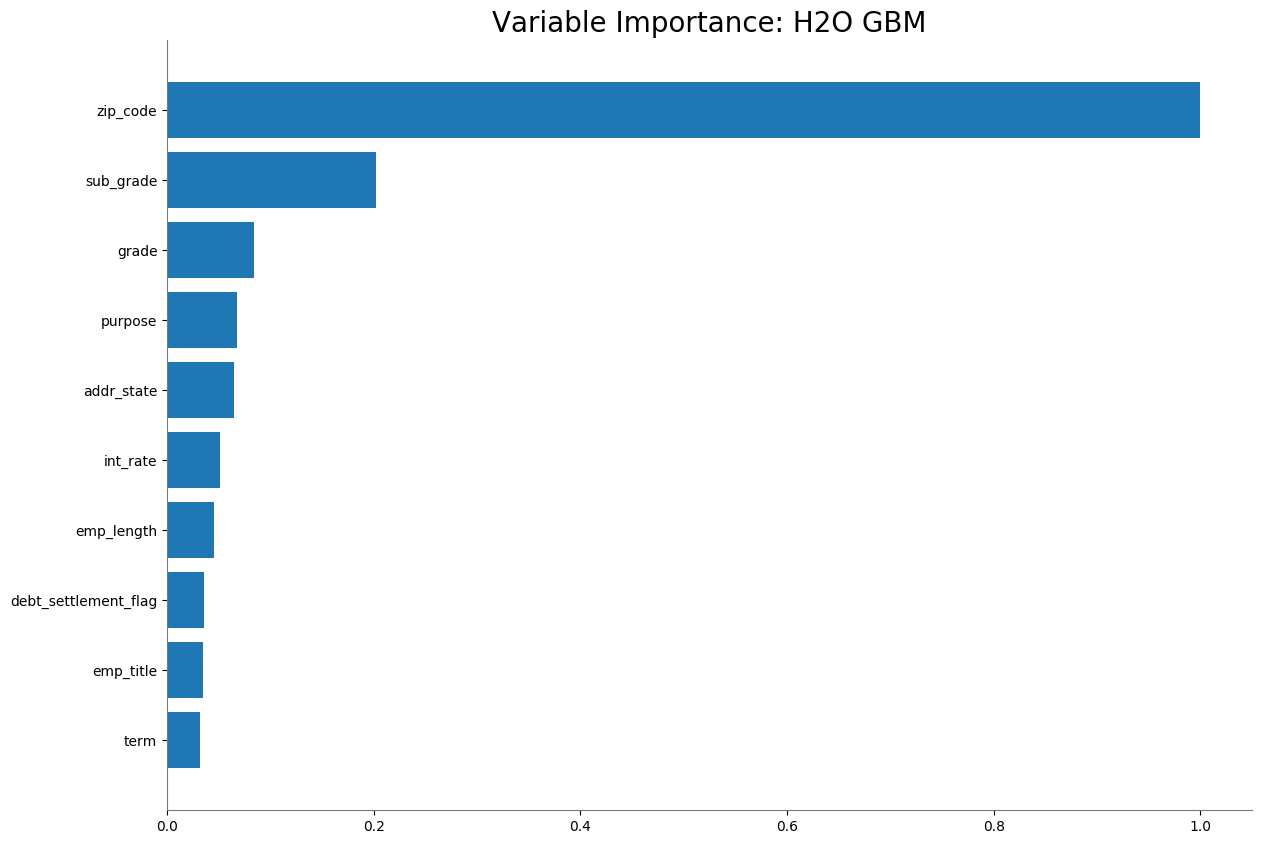

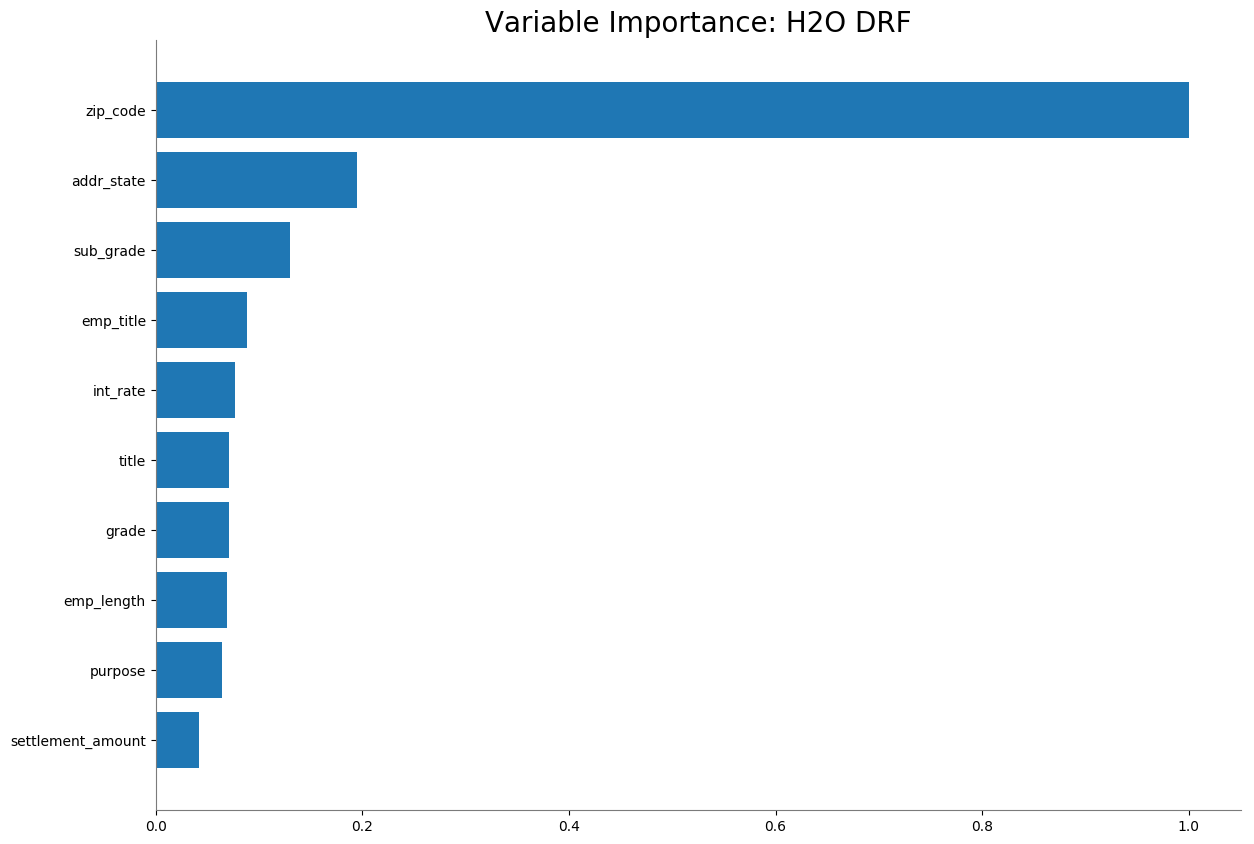

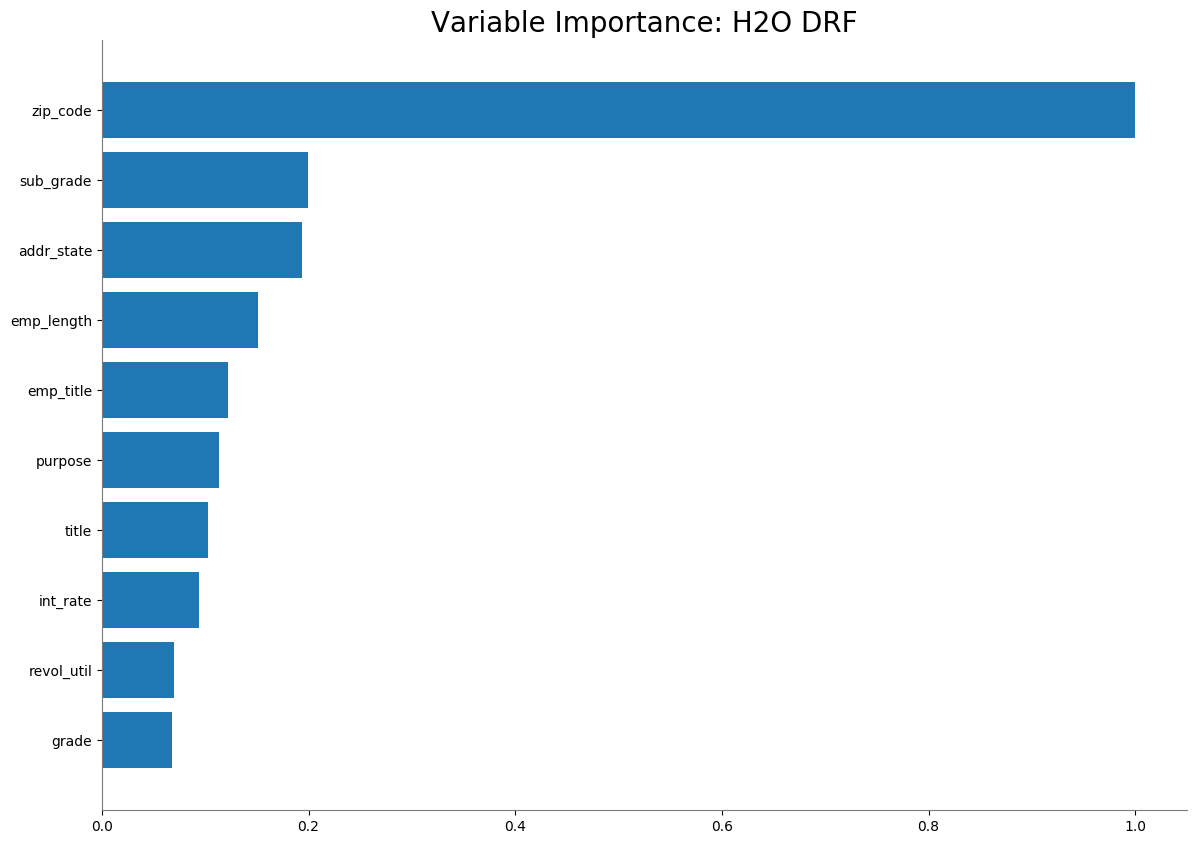

In [213]:
# Let's do variable importance for each one of the models in the LeaderBoard
# We can't do this for a StackedEnsemble, so will skip it

df = lb.as_data_frame()
for m in df['model_id'].tolist():
    if (m.find("StackedEnsemble") == -1):
        h2o.get_model(m).varimp_plot()
 

### Lets predict on the test data set

In [139]:
test_pc = aml.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [75]:
# These scores were predicted by the stacked ensemble leader ...
test_pc

predict,Charged Off,Fully Paid
Fully Paid,0.102591,0.897409
Fully Paid,0.358468,0.641532
Fully Paid,0.0590442,0.940956
Fully Paid,0.0805815,0.919418
Fully Paid,0.140266,0.859734
Fully Paid,0.0971261,0.902874
Fully Paid,0.115806,0.884194
Fully Paid,0.230807,0.769193
Fully Paid,0.0847696,0.91523
Fully Paid,0.297155,0.702845


### AutoML Leader - Model Performance on the Test Data Set

In [215]:
aml.leader.model_performance(test_data=test,xval=False)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.11730958468852062
RMSE: 0.34250486812382774
LogLoss: 0.3855464093740764
Null degrees of freedom: 8507
Residual degrees of freedom: 8503
Null deviance: 7188.838091703423
Residual deviance: 6560.457701909284
AIC: 6570.457701909284
AUC: 0.718463632100151
pr_auc: 0.930403646771387
Gini: 0.4369272642003019
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28289452225760264: 


,Charged Off,Fully Paid,Error,Rate
Charged Off,31.0,1244.0,0.9757,(1244.0/1275.0)
Fully Paid,4.0,7229.0,0.0006,(4.0/7233.0)
Total,35.0,8473.0,0.1467,(1248.0/8508.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2828945,0.9205399,375.0
max f2,0.2135056,0.9665651,382.0
max f0point5,0.6420436,0.8845155,273.0
max accuracy,0.3364484,0.8534321,367.0
max precision,0.9466341,1.0,0.0
max recall,0.2135056,1.0,382.0
max specificity,0.9466341,1.0,0.0
max absolute_mcc,0.8391524,0.2443244,132.0
max min_per_class_accuracy,0.8371119,0.6627451,134.0
max mean_per_class_accuracy,0.8391524,0.6670866,132.0


Gains/Lift Table: Avg response rate: 85.01 %, avg score: 82.82 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0101081,0.9401993,1.1762754,1.1762754,1.0,0.9421076,1.0,0.9421076,0.0118899,0.0118899,17.6275404,17.6275404
,2,0.0200987,0.9383635,1.1485983,1.1625178,0.9764706,0.9393305,0.9883041,0.9407272,0.0114752,0.0233651,14.8598336,16.2517797
,3,0.0300893,0.9366631,1.1762754,1.1670858,1.0,0.9374543,0.9921875,0.9396405,0.0117517,0.0351168,17.6275404,16.7085753
,4,0.0400799,0.9353153,1.1485983,1.1624775,0.9764706,0.9359505,0.9882698,0.9387207,0.0114752,0.0465920,14.8598336,16.2477452
,5,0.0500705,0.9341739,1.1209213,1.1541857,0.9529412,0.9347864,0.9812207,0.9379357,0.0111987,0.0577907,12.0921268,15.4185725
,6,0.1000235,0.9277818,1.1292244,1.1417197,0.96,0.9310219,0.9706228,0.9344829,0.0564081,0.1141988,12.9224388,14.1719723
,7,0.1500940,0.9209338,1.1072452,1.1302192,0.9413146,0.9243835,0.9608457,0.9311138,0.0554403,0.1696392,10.7245158,13.0219202
,8,0.2000470,0.9137033,1.1236890,1.1285886,0.9552941,0.9174954,0.9594595,0.9277132,0.0561316,0.2257708,12.3688975,12.8588564
,9,0.3000705,0.8989193,1.0961062,1.1177611,0.9318449,0.9063246,0.9502546,0.9205836,0.1096364,0.3354072,9.6106223,11.7761117
,10,0.3999765,0.8825644,1.0697187,1.1057611,0.9094118,0.8903436,0.9400529,0.9130303,0.1068713,0.4422784,6.9718691,10.5761099
